In [2]:
# Importing libraries
import pandas as pd
import numpy as np 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import warnings

warnings.filterwarnings('ignore')

In [3]:
# Creating DataFrame
df = pd.read_csv('../data/adult.data')
df

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
# The DataFrame did not have any column names, instead they took on the first row
# Lets replace that row with the proper column names
df.columns = ['age','workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', \
              'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', \
              'native-country', 'income']

In [5]:
# Checking for missingness, count, and Dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
# Documentation tells us there are infact missing values, looking for the place holder
for column in df.columns:
    print(df[column].value_counts())
    print()

age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64

workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

fnlwgt
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: count, Length: 21647, dtype: int64

education
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          

In [7]:
# Use a regular expression to filter rows that do not contain '?'
df = df[~df.astype(str).apply(lambda x: x.str.contains(r'\?', na=False)).any(axis=1)]

# Reset the index of the DataFrame
df.reset_index(drop=True, inplace=True)

# Triple checking for missing values
(df == '?').any().any()

False

In [8]:
# Drop rows where 'native-country' is not 'United-States'
df = df[df['native-country'] == ' United-States']

# Drop the 'native-country' column
df.drop(columns=['native-country'], inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27503 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             27503 non-null  int64 
 1   workclass       27503 non-null  object
 2   fnlwgt          27503 non-null  int64 
 3   education       27503 non-null  object
 4   education-num   27503 non-null  int64 
 5   marital-status  27503 non-null  object
 6   occupation      27503 non-null  object
 7   relationship    27503 non-null  object
 8   race            27503 non-null  object
 9   sex             27503 non-null  object
 10  capital-gain    27503 non-null  int64 
 11  capital-loss    27503 non-null  int64 
 12  hours-per-week  27503 non-null  int64 
 13  income          27503 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.1+ MB


In [10]:
# Remove leading and trailing whitespace from 'income' and 'sex' column
df['income'] = df['income'].str.strip()
df['sex'] = df['sex'].str.strip()

# Define mappings for 'income' and 'sex'
income_mapping = {'<=50K': 0, '>50K': 1}
sex_mapping = {'Male': 0, 'Female': 1}

# Apply the mappings using .loc
df.loc[:, 'income'] = df['income'].map(income_mapping)
df.loc[:, 'sex'] = df['sex'].map(sex_mapping)

# Convert 'income' and 'sex' columns to integers
df['income'] = df['income'].astype(int)
df['sex'] = df['sex'].astype(int)

In [11]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,13,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,0,40,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,0,40,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,1,0,0,40,0
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,45,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,1,0,0,38,0
30157,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,0,0,0,40,1
30158,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,1,0,0,40,0
30159,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,0,0,0,20,0


In [12]:
# I have no idea what this is. I'm going to check to see if its statistically significant
df['fnlwgt'].describe()

count    2.750300e+04
mean     1.870590e+05
std      1.047234e+05
min      1.376900e+04
25%      1.158690e+05
50%      1.768110e+05
75%      2.341080e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64

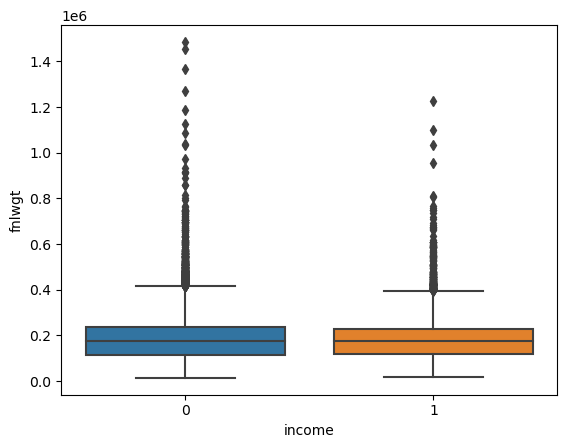

In [13]:
# Checking distribution
sns.boxplot(x='income', y='fnlwgt', data=df)
plt.show()

In [14]:
# Checking statistical significance
income_below_50k = df[df['income'] == 0]['fnlwgt']
income_above_50k = df[df['income'] == 1]['fnlwgt']

t_stat, p_value = ttest_ind(income_below_50k, income_above_50k)
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

T-statistic: -0.3593140748723247
P-value: 0.7193629049138934


In [15]:
# Large amount of outliers and high p-value, likely will skew the model and overcomplicate it as well
# Dropping the column
df.drop(columns= 'fnlwgt', inplace = True)

In [16]:
# This isnt even ordered properly, and its supposed to be the numbered form of educaition
# Im just going to OrdinalEncode education and have something that actually follows the proper order of encoding
# This is just unnecessary
df.drop(columns= 'education-num', inplace = True)

I believe that the rest of this data set is going to be completely relevant to my model. Ive dropped all columns and rows that are redundant. All that is left is to One-Hot encode and Ordinal Encode all of the object columns. Which I will do in the next notebook because I plan on doing so after my train_test_split. This way I can avoid any data leakage.

In [17]:
#Exporting DataFrame as CSV

df.to_csv('../data/SalaryData')